<a href="https://colab.research.google.com/github/JairEsc/Fordecyt/blob/main/Tipos_materiales_logaritmizacion_normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [93]:
Data=pd.read_excel("BASE_REA.xlsx",)
Data['ID']=np.arange(2,len(Data)+2)#Para que coincida.

In [94]:
Base=(Data[["CLASIFICAC", "C/VR"]])

Campos_distintos:  ['Compuestos farmaceuticos', 'Drogas ilegales', 'Disrupcien endocrina', 'Fermaco de uso habitual', 'Pategenos emergentes', 'Plaguicidas', 'Plesticos', 'Alquilfenoles y otros compuestos orgenicos', 'Compuesto orgenico voletil', 'Metales pesados y compuestos organoestennicos', 'Hidrocarburos arometicos (HPA)', 'Fesico-quemicos', 'Gases Texicos', 'Material Particulado']
Numero de Campos_distintos:  14


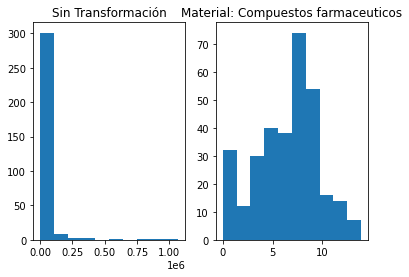

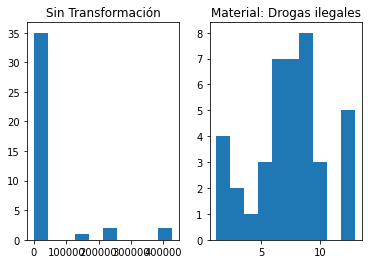

Para uno si sirve


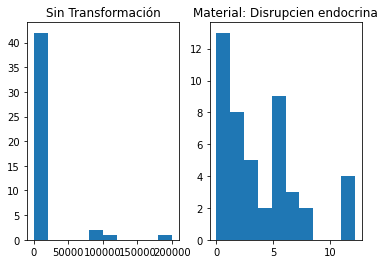

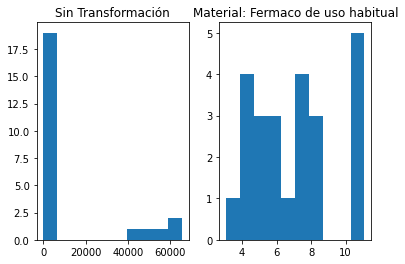

Para uno si sirve


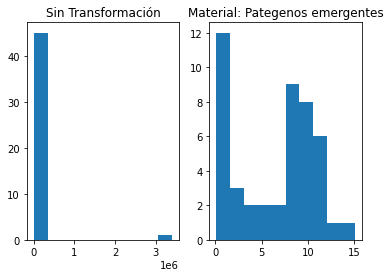

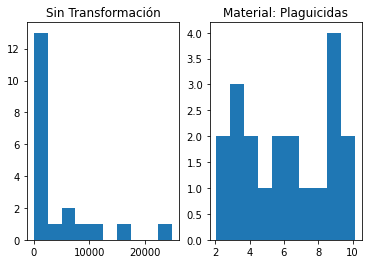

Para uno si sirve


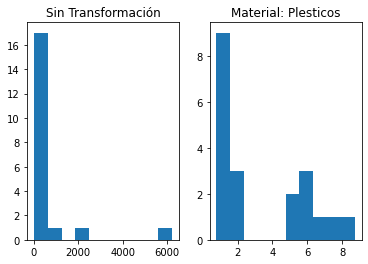

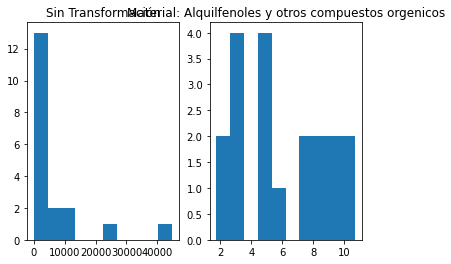

Para uno si sirve


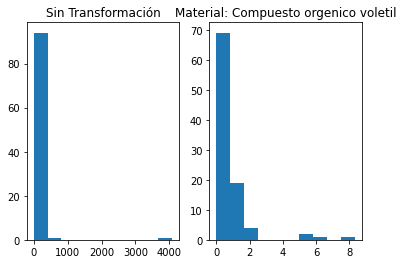

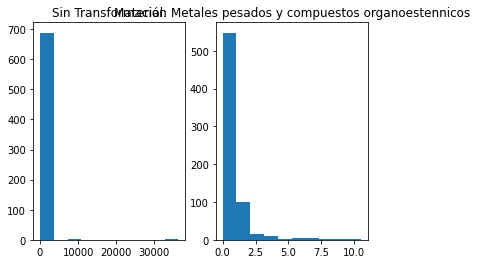

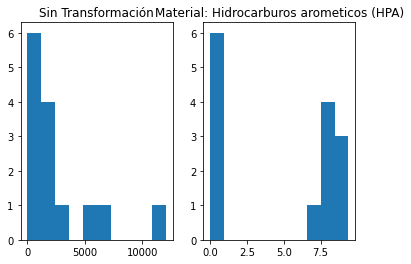

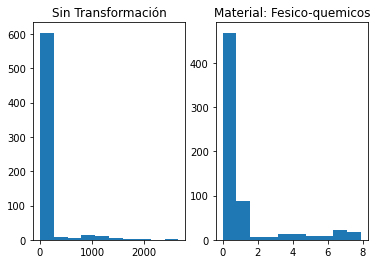

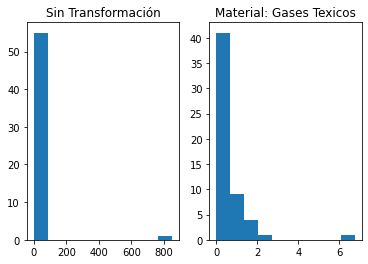

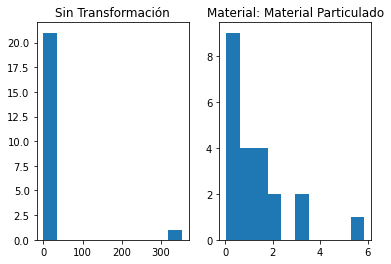

In [95]:
campos=Base['CLASIFICAC']
campos_distintos=[]
jala=[]
from scipy.stats import shapiro
for campo in campos:
    if campo not in campos_distintos:
        campos_distintos.append(campo)
print("Campos_distintos: ", campos_distintos)
print("Numero de Campos_distintos: ", len(campos_distintos))

for campo in campos_distintos:
    subset=Base[Base['CLASIFICAC']==campo]
    #print(subset)
    #Este subset es la base correspondiente a un tipo de material.
    figure, axis = plt.subplots(1, 2)
    axis[0].hist(subset['C/VR'])
    axis[0].set_title("Sin Transformación")
    transformados=np.log(subset['C/VR']+1)
    axis[1].hist(transformados)
    axis[1].set_title("Con Transformación")
    
    plt.title('Material: '+campo)
    plt.show()
    p1=shapiro(subset['C/VR']).pvalue
    p2=shapiro(transformados).pvalue
    if(p1>0.05):
        print("Para uno si servía")
        jala.append(campo)
    if(p2>0.05):
        jala.append(campo)##Después de la transformacion satisface la prueba de Shapiro
        print("Para uno si sirve")

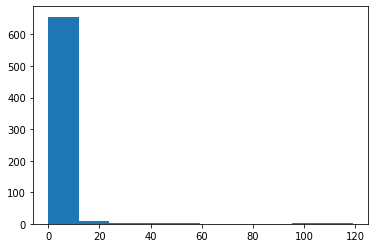

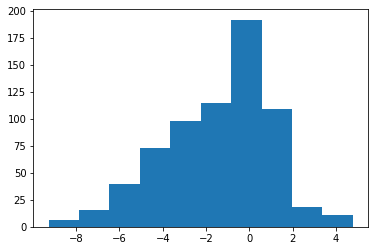

In [105]:
metales=Base[Base['CLASIFICAC']=='Metales pesados y compuestos organoestennicos']
plt.hist(metales.loc[metales['C/VR'] <np.mean(metales['C/VR'])]['C/VR'])#98% de los datos
plt.show()
plt.hist(np.log(metales.loc[metales['C/VR'] <np.mean(metales['C/VR'])]['C/VR']))#Quitando datos
plt.show()


In [110]:
np.sum()

307

In [106]:
si_jalaron=[]
jala.append('Metales pesados y compuestos organoestennicos')
for si_jala in jala:
    Material=Data[Data['CLASIFICAC']==si_jala]
    if(si_jala=='Metales pesados y compuestos organoestennicos'):
        Material=Material.loc[Material['C/VR'] <np.mean(Material['C/VR'])]
        Material['C/VR']=np.log(Material['C/VR'])
        Material['C/VR']=(Material['C/VR']-np.mean(Material['C/VR']))/np.std(Material['C/VR'])
    else:
        Material['C/VR']=np.log(1+Material['C/VR'])
        Material['C/VR']=(Material['C/VR']-np.mean(Material['C/VR']))/np.std(Material['C/VR'])
    si_jalaron.append(Material)
result = pd.concat(si_jalaron)
print(result)
result.to_excel('pandas_to_excel.xlsx', sheet_name='new_sheet_name')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


              X          Y           Contaminan  \
5    -99.152993  20.097192  Cafeena (C8H10N4O2)   
6    -99.080766  20.214896  Cafeena (C8H10N4O2)   
11   -99.261358  20.118247  Cafeena (C8H10N4O2)   
12   -99.152993  20.097192  Cafeena (C8H10N4O2)   
21   -99.009672  20.274229  Cafeena (C8H10N4O2)   
...         ...        ...                  ...   
2056 -99.276135  20.166839                 Zinc   
2057 -99.213765  20.073200                Cobre   
2058 -99.213765  20.073200                 Zinc   
2059 -99.146525  20.224286                 Zinc   
2060 -99.270761  20.173271                 Zinc   

                                  field_4  \
5     Otros Compuestos Organicos (Dragas)   
6     Otros Compuestos Organicos (Dragas)   
11    Otros Compuestos Organicos (Dragas)   
12    Otros Compuestos Organicos (Dragas)   
21    Otros Compuestos Organicos (Dragas)   
...                                   ...   
2056                    Metales (Pesados)   
2057                    Met

In [111]:
Met=Base[Base['CLASIFICAC']=='Metales pesados y compuestos organoestennicos']
np.sum(Met['C/VR']>=np.mean(Met['C/VR']))

14